<a href="https://colab.research.google.com/github/MahdiZakipour/from-Colaboratory/blob/main/A_to_Z_STAR_MSc_THESIS_Classification_for_Regime_powered_by_PROCESSED_COMSOL_data_All_3_Methods_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# worked
# show working directory
import os
#os.getcwd()
os.chdir('D:\Learning\Deep Learning A-Z course - my files\Section 8 Deep Learning\Deep Learning for Droplet D by  Comsol')
os.getcwd()


'D:\\Learning\\Deep Learning A-Z course - my files\\Section 8 Deep Learning\\Deep Learning for Droplet D by  Comsol'

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Load the dataset
comsol_data = pd.read_csv('D:/Learning/Deep Learning A-Z course - my files/Section 8 Deep Learning/Deep Learning for Droplet D by  Comsol/Essentials Output#2- Processed with R - Comsol data for python.csv')
comsol_data = comsol_data.drop('Unnamed: 0', axis = 1)

#print(comsol_data)
comsol_data.head()
comsol_data[10:20]

,v_disp_horiz,v_cont_vert,miu_disp,miu_cont,surface_t,d,f,Ca_disp,Re_disp,Q_rel,Miu_rel,Ca*d - new Feature,Catg,new Regime Class
10,0.25,2,1.95,59.2,1.00,0.12,22.222222,0.487500,0.128205,0.125,0.032939,4.062500,1,drip
11,0.25,2,1.95,59.2,6.00,0.28,6.060606,0.081250,0.128205,0.125,0.032939,0.290179,1,squeez
12,0.25,2,1.95,59.2,9.00,0.36,4.597701,0.054167,0.128205,0.125,0.032939,0.150463,1,squeez
13,0.25,2,1.95,59.2,1.66,0.10,19.047619,0.293675,0.128205,0.125,0.032939,2.936747,1,drip
14,0.66,2,1.95,59.2,5.00,0.34,20.000000,0.257400,0.338462,0.330,0.032939,0.757059,3,drip
15,0.40,2,1.95,59.2,5.00,0.32,21.333333,0.156000,0.205128,0.200,0.032939,0.487500,3,squeez
16,0.25,2,1.95,59.2,5.00,0.48,7.017544,0.097500,0.128205,0.125,0.032939,0.203125,3,squeez
17,1.00,2,1.95,59.2,5.00,0.42,13.333333,0.390000,0.512821,0.500,0.032939,0.928571,3,drip
18,1.50,2,1.95,59.2,5.00,0.46,16.666667,0.585000,0.769231,0.750,0.032939,1.271739,3,drip
19,0.25,2,59.20,59.2,5.00,0.28,6.944444,2.960000,0.004223,0.125,1.000000,10.571429,2,jet


In [ ]:
x = comsol_data.iloc[:, 0:12].values
y = comsol_data.iloc[:, 13].values

In [ ]:
x[0:3,:]
# Encoding needed? NO, on X we don't need. BUT for Y, we need.

array([[2.50000000e-01, 2.00000000e+00, 5.92000000e+01, 5.92000000e+01,
        5.00000000e+00, 2.80000000e-01, 6.94444444e+00, 2.96000000e+00,
        4.22297297e-03, 1.25000000e-01, 1.00000000e+00, 1.05714286e+01],
       [2.50000000e-01, 2.00000000e+00, 1.18400000e+02, 5.92000000e+01,
        5.00000000e+00, 1.20000000e-01, 8.33333333e+01, 5.92000000e+00,
        2.11148649e-03, 1.25000000e-01, 2.00000000e+00, 4.93333333e+01],
       [2.50000000e-01, 2.00000000e+00, 7.40000000e+01, 5.92000000e+01,
        5.00000000e+00, 1.80000000e-01, 2.22222222e+01, 3.70000000e+00,
        3.37837838e-03, 1.25000000e-01, 1.25000000e+00, 2.05555556e+01]])

In [ ]:
# Encoding Categorical data - dummy ENCODING  - OneHotEncoding
# to Encode Y :
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y[0:6]

# Avoiding dummy variable Trap
##y_encoded = y_encoded[:, 1:]
##print('y_encoded : \n',y_encoded[0:7])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# Splitting the data into Test and Training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size = 0.3, shuffle = 'TRUE')
print('x_test : \n',x_test[0:3,:])
print('y_test : \n',y_test[0:3])

x_test : 
 [[2.50000000e-01 2.00000000e+00 1.95000000e+00 5.92000000e+01
  2.50000000e+00 1.00000000e-01 3.33333333e+01 1.95000000e-01
  1.28205128e-01 1.25000000e-01 3.29391892e-02 1.95000000e+00]
 [2.50000000e-01 2.00000000e+00 1.95000000e+00 5.92000000e+01
  1.66000000e+00 1.00000000e-01 1.90476191e+01 2.93674699e-01
  1.28205128e-01 1.25000000e-01 3.29391892e-02 2.93674699e+00]
 [2.50000000e-01 2.00000000e+00 8.88000000e+01 5.92000000e+01
  5.00000000e+00 2.00000000e-01 4.16666667e+01 4.44000000e+00
  2.81531532e-03 1.25000000e-01 1.50000000e+00 2.22000000e+01]]
y_test : 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
# feature Scaling /// NORMALIZATION - or - STANDARADIZATION
from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)
##print('x_test : \n',x_test[0:3,:])
##print('y_test : \n',x_train[0:3])

In [ ]:
### Part-2
### Create the DNN
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the DNN
classifier = Sequential()
# Adding the Layers :
# 1 : input Layer + 1st hidden layer, 2 : 2nd hidden layer, 3: Output layer
#classifier.add(keras.layers.Flatten()) # input; if we needed Flatttening 
classifier.add(keras.layers.Dense(6, activation = 'relu', input_dim = 12))# inputLayer + 1st hidden layer
classifier.add(keras.layers.Dense(6, activation = 'relu'))    # 2nd hidden layer
classifier.add(keras.layers.Dense(3, activation = 'softmax')) # output layer; for Binary Classification
#                                                             # Note: if more than Binary;Ex: 3 classes
#                                                             # ==> units = 3, activation='softmax'

# Compiling our Model (= applying 'Stochastic Gradient Descent')
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#                                      # Note: if more than Binary;Ex: 3 classes
#                                      # ==> loss = categorical_crossentropy


# Fitting the ANN to the Training DATA-Set
classifier.fit(x = x_train, y = y_train, batch_size = 10, epochs = 150) # Note :
# batch_size = after what 'number of Observations' (used to train); do you want to UPDATE wheights ?
# epoch = after what 'number of Times' of passing DATA Set to the Model; do you want to STOP the training ?

Epoch 1/150
4/4 [==============================] - 0s 0s/step - loss: 1.3277 - accuracy: 0.2286
Epoch 2/150
4/4 [==============================] - 0s 751us/step - loss: 1.2889 - accuracy: 0.2286
Epoch 3/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2543 - accuracy: 0.2571
Epoch 4/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2198 - accuracy: 0.2571
Epoch 5/150
4/4 [==============================] - 0s 1000us/step - loss: 1.1921 - accuracy: 0.2571
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1632 - accuracy: 0.2571
Epoch 7/150
4/4 [==============================] - 0s 1000us/step - loss: 1.1404 - accuracy: 0.2571
Epoch 8/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1141 - accuracy: 0.2571
Epoch 9/150
4/4 [==============================] - 0s 999us/step - loss: 1.0927 - accuracy: 0.2571
Epoch 10/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0711 - accuracy: 0.2857
Epoch 11/150
4/4 [==

In [ ]:
### Part 3 - Evauation
### 3-1 : Predict on Test Set
y_pred = classifier.predict(x_test)
print('y_pred: \n',y_pred)
print('y_test: \n',y_test)

y_pred: 
 [[8.90197635e-01 9.81322229e-02 1.16702328e-02]
 [9.08972085e-01 8.38122442e-02 7.21562048e-03]
 [4.50229294e-08 9.94912624e-01 5.08736866e-03]
 [1.98767515e-23 1.00000000e+00 2.76785812e-08]
 [4.17462558e-01 1.04470208e-01 4.78067249e-01]
 [8.69564509e-09 9.96734679e-01 3.26530705e-03]
 [4.77328226e-02 1.45515054e-02 9.37715709e-01]
 [1.23282149e-03 1.38373615e-03 9.97383416e-01]
 [4.50229294e-08 9.94912624e-01 5.08736866e-03]
 [1.57177761e-01 6.26012608e-02 7.80220926e-01]
 [6.69394314e-01 1.51397288e-01 1.79208398e-01]
 [8.55658233e-01 1.21500373e-01 2.28413586e-02]
 [2.24406973e-01 6.41133413e-02 7.11479664e-01]
 [2.17641727e-03 2.11091083e-03 9.95712638e-01]
 [5.24852872e-01 1.18064195e-01 3.57082963e-01]
 [2.87068519e-06 9.79984999e-01 2.00120639e-02]]
y_test: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
### 3-3 : CONFUSION MATRIX; is the Model Validated on the Test Set ? 
# then : making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix_ANN = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

##conf_m = confusion_matrix(y_test, y_preddd)
print(matrix_ANN) # finally leads to --> (1510 + 208 --> CORRECT Predictions)
#                                    (85 + 197   --> in-CORRECT Predictions)

# now : Compute Accuracy using Confusion Matrix 
##accuracy_conf_m = (1510 + 208)/ 2000
##print(accuracy_conf_m)  # accuracy_conf_m = 86 % ; which is Equal to Model Accuracy --> Valideted !

[[5 0 1]
 [0 5 0]
 [0 0 5]]


Text(24.0, 0.5, 'Predicted Class')

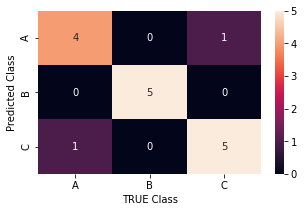

In [ ]:
### 3-3-2 Plot Confusion Matrix - ANN
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = matrix_ANN

df_cm = pd.DataFrame(array, index = [i for i in "ABC"],
                     columns = [i for i in "ABC"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)
plt.xlabel('TRUE Class')
plt.ylabel('Predicted Class') # TP(1,1), FP(1,2), FN(2,1), TN(2,2) ;Acc=(TP+TN)/(TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
ANN_prediction = [0,2,2,1,1,2,2,2,2,0,1,2,2,1,0,1] # handy ANN_prediction = decode(y_pred) [0,2,2,1,1,2,2,2,2,0,1,2,2,1,0,1]
#print(ANN_prediction)
#np.ndim(ANN_prediction)
result1 = classification_report(y_test, ANN_prediction)
print('ANN Classification Report:')
print (result1)
result2 = accuracy_score(y_test,ANN_prediction)
print('ANN Accuracy:',result2)

In [ ]:
### 3-4 SVM
from sklearn.svm import SVC

# reshape the data for SVM:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y_svm = encoder.transform(y)

# Splitting the data into Test and Training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_svm, test_size = 0.1, shuffle = 'TRUE')
# feature Scaling /// NORMALIZATION - or - STANDARADIZATION
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

# Create your regressor object
SVM_model = SVC(kernel = 'rbf', random_state = 0) # rbf: Gaussian, good for Non-Linear, others: 'linear', 'sigmoid'

# fit to the training Data
SVM_model.fit(x_train , y_train)

SVC(random_state=0)

In [ ]:
### SVM Prediction
print('y_test = ' , y_test)

# make prediction
SVM_predition = SVM_model.predict(x_test)
print("SVM predict=", SVM_predition)

y_test =  [2 0 2 0 1 0 1 1 2 1 0 2 1 1 0 1 2 2 0 2 0]
SVM predict= [2 0 2 0 1 0 1 1 2 1 0 2 1 0 0 1 2 1 0 2 2]


In [ ]:
### Evaluation : CONFUSION MATRIX; is the Model Validated on the Test Set ? 
from sklearn.metrics import confusion_matrix
matrix_SVM = confusion_matrix(y_test, SVM_predition)
print(matrix_SVM) # finally leads to --> (1510 + 208 --> CORRECT Predictions)
#                                    (85 + 197   --> in-CORRECT Predictions)

# now : Compute Accuracy using Confusion Matrix 
##accuracy_conf_m = (1510 + 208)/ 2000
##print(accuracy_conf_m)  # accuracy_conf_m = 86 % ; which is Equal to Model Accuracy --> Valideted !

[[6 0 1]
 [1 6 0]
 [0 1 6]]


Text(24.0, 0.5, 'Predicted Class')

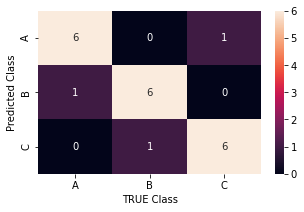

In [ ]:
### Plot Confusion Matrix - SVM
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = matrix_SVM

df_cm = pd.DataFrame(array, index = [i for i in "ABC"],
                     columns = [i for i in "ABC"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)
plt.xlabel('TRUE Class')
plt.ylabel('Predicted Class') # TP(1,1), FP(1,2), FN(2,1), TN(2,2) ;Acc=(TP+TN)/(TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = classification_report(y_test, SVM_predition)
print('SVM Classification Report:')
print (result1)
result2 = accuracy_score(y_test,SVM_predition)
print('SVM Accuracy:',result2)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.75      0.86         4
           2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.94      0.83      0.87        18
weighted avg       0.91      0.89      0.89        18

SVM Accuracy: 0.8888888888888888


In [ ]:
### 3-5 Random Forest
# ITS BETTER FOR MORE THAN 1-DIMENSION PROBLESMs
from sklearn.ensemble import RandomForestClassifier

# reshape the data for RF:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y_rf = encoder.transform(y)

# Splitting the data into Test and Training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_rf, test_size = 0.1, shuffle = 'TRUE')
# feature Scaling /// NORMALIZATION - or - STANDARADIZATION
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

# Create the regressor object
RF_model = RandomForestClassifier(n_estimators= 50, criterion = 'entropy') # n_estimators = Number of trees

# Fit to the data
RF_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
### Random Forest Prediction
print('y_test = ' , y_test)

# make prediction
RF_predition = RF_model.predict(x_test)
print("RF predict=", RF_predition)

y_test =  [0 0 2 0 2 0 2 1 0 0 2 1 2 2 0 1 1 1 2 2 1]
RF predict= [2 0 2 0 2 0 2 1 0 2 0 1 2 2 0 1 1 1 0 2 1]


In [ ]:
### Evaluation : CONFUSION MATRIX; is the Model Validated on the Test Set ? 
from sklearn.metrics import confusion_matrix
matrix_RF = confusion_matrix(y_test, RF_predition)
print(matrix_RF) # finally leads to --> (1510 + 208 --> CORRECT Predictions)
#                                    (85 + 197   --> in-CORRECT Predictions)

# now : Compute Accuracy using Confusion Matrix 
##accuracy_conf_m = (1510 + 208)/ 2000
##print(accuracy_conf_m)  # accuracy_conf_m = 86 % ; which is Equal to Model Accuracy --> Valideted !

[[5 0 2]
 [0 6 0]
 [2 0 6]]


Text(24.0, 0.5, 'Predicted Class')

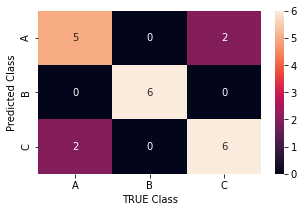

In [ ]:
### Plot Confusion Matrix - RF
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = matrix_RF

df_cm = pd.DataFrame(array, index = [i for i in "ABC"],
                     columns = [i for i in "ABC"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)
plt.xlabel('TRUE Class')
plt.ylabel('Predicted Class') # TP(1,1), FP(1,2), FN(2,1), TN(2,2) ;Acc=(TP+TN)/(TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = classification_report(y_test, RF_predition)
print('Random Forest Classification Report:')
print (result1)
result2 = accuracy_score(y_test,RF_predition)
print('Random Forest Accuracy:',result2)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       1.00      1.00      1.00         2
           2       0.67      0.80      0.73         5

    accuracy                           0.81        16
   macro avg       0.85      0.86      0.85        16
weighted avg       0.83      0.81      0.82        16

Random Forest Accuracy: 0.8125


In [ ]:
### Evaluation : k-fold cross validation
##from keras.utils import np_utils
from sklearn.model_selection import cross_val_score

##kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
accuracies = cross_val_score(estimator = SVM_model , x, y, cv=5)
accuracies.mean()
accuracies.std()

In [ ]:
### 3-4-4 KNN
from sklearn.neighbors import KNeighborsClassifier

# reshape the data for KNN:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y_KNN = encoder.transform(y)

# Splitting the data into Test and Training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_KNN, test_size = 0.1, shuffle = 'TRUE')
# feature Scaling /// NORMALIZATION - or - STANDARADIZATION
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

# Create your regressor object
KNN_model = KNeighborsClassifier() 
# fit to the training Data
KNN_model.fit(x_train , y_train)

KNeighborsClassifier()

In [ ]:
### KNN Prediction
print('y_test = ' , y_test)

# make prediction
KNN_predition = KNN_model.predict(x_test)
print("KNN predict=", KNN_predition)

y_test =  [1 2 2 0 1 1]
KNN predict= [1 1 2 0 1 1]


In [ ]:
### Evaluation : CONFUSION MATRIX; is the Model Validated on the Test Set ? 
from sklearn.metrics import confusion_matrix
matrix_KNN = confusion_matrix(y_test, KNN_predition)
print(matrix_KNN) # finally leads to --> (1510 + 208 --> CORRECT Predictions)
#                                    (85 + 197   --> in-CORRECT Predictions)

# now : Compute Accuracy using Confusion Matrix 
##accuracy_conf_m = (1510 + 208)/ 2000
##print(accuracy_conf_m)  # accuracy_conf_m = 86 % ; which is Equal to Model Accuracy --> Valideted !

[[6 0 1]
 [0 6 0]
 [1 0 7]]


Text(24.0, 0.5, 'Predicted Class')

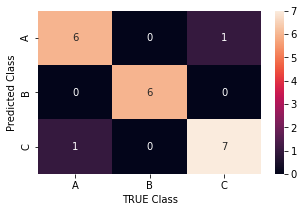

In [ ]:
### Plot Confusion Matrix - KNN
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = matrix_KNN

df_cm = pd.DataFrame(array, index = [i for i in "ABC"],
                     columns = [i for i in "ABC"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)
plt.xlabel('TRUE Class')
plt.ylabel('Predicted Class') # TP(1,1), FP(1,2), FN(2,1), TN(2,2) ;Acc=(TP+TN)/(TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = classification_report(y_test, KNN_predition)
print('KNN Classification Report:')
print (result1)
result2 = accuracy_score(y_test,KNN_predition)
print('KNN Accuracy:',result2)

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.71      1.00      0.83         5
           2       0.80      0.67      0.73         6

    accuracy                           0.83        18
   macro avg       0.84      0.84      0.83        18
weighted avg       0.85      0.83      0.83        18

KNN Accuracy: 0.8333333333333334


In [ ]:
### 4 Visualisation
# 4-2 Test set 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, Y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01 ),
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01 ))
#X1.shape[1] = 12
plt.contourf(X1, X2, SVM_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X1.min(), X1.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Model (Test Set)')
plt.xlabel('X11')
plt.ylabel('Y11')
plt.legend()
plt.show()

In [ ]:
### prediction for dripping;  Squeezing 2, Jetting 1, Dripping 0
# Matlloooob : [0.25, 2, 19.25 miu,59.2, 5 XXXt, 0.120 XXXd, 80 XXXf,3.5 XXXca,0.003378 XXXre, 0.125 qr,2 XXXmiur, 20XXXca*d]
x_pred = [[0.25 , 2 ,119.5,59.20,3 ,0.114,80 ,9.958333333, 0.004184100418,0.125,2.018581081,1.13525]]
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_pred = scale_x.fit_transform(x_pred)

classifier.predict(x_pred)
#SVM_model.predict(x_pred)
#RF_model.predict(x_pred)
#KNN_model.predict(x_pred)

array([[0.5947331 , 0.18710706, 0.21815981]], dtype=float32)

In [ ]:
### prediction for sqz;  Squeezing 2, Jetting 1, Dripping 0

x_pred2 = [[0.05, 2 ,119.5,59.20,3 ,0.450,7.01 ,1.991666667,0.0008368200837,0.025,2.018581081,0.89625]]
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_pred2 = scale_x.fit_transform(x_pred2)

#classifier.predict(x_pred2)
SVM_model.predict(x_pred2)
#RF_model.predict(x_pred2)
#KNN_model.predict(x_pred2)

array([2])